<h1>Arabic Music Emotion Recognition</h1>
By: MHD SHADI HASAN

<h2>Problem Background</h2>

For this project, it is required to build a classifier that can predict the emotion of an Arabic music track based on acoustic features. In particular, the model will predict Valence and Arousal ratings as High or Low both separately and combined.

**Data**

|Feature|Values|
|----|----|
|SN|Number to identify the record|
|participantAge|Age of the participant|
|participantSex|Sex of the participant|
|title|The title of the track|
|artist|Name of the artist|
|valence|Valence rating ('H' or 'L')|
|arousal|Arousal rating ('H' or 'L')|
|durationSec|The duration of the track in seconds|
|7 acoustic features|The features from MIRToolbox to be used for training|

<h2>Data Exploration</h2>

In [1]:
#import needed libraries for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data to a pandas dataframe
dfRaw = pd.read_excel('MusicData.xlsx')
dfRaw.head()

,SN,participantAge,participantSex,title,artist,valence,arousal,durationSec,lowEnergy,pulseClarity,zeroCross,rollOff,brightness,centroid,mode
0,1,28,F,Ajabi Ala Harfain,Abdulrahman Mohammad,H,L,578,0.56733,5.198887e+05,488.8226,2756.1493,0.24941,1500.5230,-0.26964
1,2,24,F,Abu Oyoun Garea,Abdulhalim Hafez,H,H,546,0.51228,8.865148e+05,1055.6710,4925.5142,0.39144,2330.8741,0.13280
2,3,28,F,Atbaa AlNamroud,AlNamroud,L,H,307,0.34057,1.626029e+06,1632.5438,7707.9163,0.61017,3710.0141,-0.07405
3,4,20,F,Bint ElShalabiya,Aleph,H,H,465,0.53260,4.177509e+05,960.8992,4503.8223,0.35583,2279.3499,-0.05992
4,5,23,M,Hodnah,Cairokee,H,L,269,0.51714,1.653696e+05,858.1351,5966.4516,0.42240,2614.5717,0.10055


In [3]:
#participants age range
print('Age range is between', dfRaw['participantAge'].min(), 'and', dfRaw['participantAge'].max())

#participants sex
print('Both sex groups', dfRaw['participantSex'].unique(), 'were included')

Age range is between 20 and 28
Both sex groups ['F' 'M'] were included


In [4]:
#music duration
print('The duration of music audios had ( M =',dfRaw['durationSec'].mean(), ', SD =',dfRaw['durationSec'].std(),')')

The duration of music audios had ( M = 551.125 , SD = 661.1541497885412 )


In [5]:
#function to compute 'emotionQuadrant'
def qurt(VA):
    if VA[0]=='H' and VA[1]=='H':
        return 1
    elif VA[0]=='L' and VA[1]=='H':
        return 2
    elif VA[0]=='L' and VA[1]=='L':
        return 3
    else:
        return 4

#add 'emotionQuadrant' to dataframe
dfRaw['emotionQuadrant'] = dfRaw[['valence','arousal']].apply(lambda VA: qurt(VA), axis=1)

dfRaw.head()

,SN,participantAge,participantSex,title,artist,valence,arousal,durationSec,lowEnergy,pulseClarity,zeroCross,rollOff,brightness,centroid,mode,emotionQuadrant
0,1,28,F,Ajabi Ala Harfain,Abdulrahman Mohammad,H,L,578,0.56733,5.198887e+05,488.8226,2756.1493,0.24941,1500.5230,-0.26964,4
1,2,24,F,Abu Oyoun Garea,Abdulhalim Hafez,H,H,546,0.51228,8.865148e+05,1055.6710,4925.5142,0.39144,2330.8741,0.13280,1
2,3,28,F,Atbaa AlNamroud,AlNamroud,L,H,307,0.34057,1.626029e+06,1632.5438,7707.9163,0.61017,3710.0141,-0.07405,2
3,4,20,F,Bint ElShalabiya,Aleph,H,H,465,0.53260,4.177509e+05,960.8992,4503.8223,0.35583,2279.3499,-0.05992,1
4,5,23,M,Hodnah,Cairokee,H,L,269,0.51714,1.653696e+05,858.1351,5966.4516,0.42240,2614.5717,0.10055,4


H    14
L    10
Name: valence, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

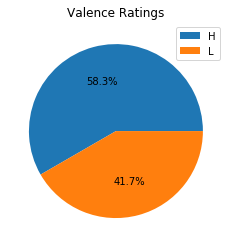

In [6]:
#explore 'valence' ratings
print(dfRaw['valence'].value_counts())

plt.pie(dfRaw['valence'].value_counts(), autopct='%1.1f%%')
plt.legend(labels=['H','L'])
plt.title('Valence Ratings')
plt.show

L    14
H    10
Name: arousal, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

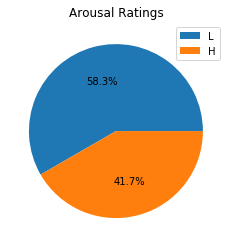

In [7]:
#explore 'arousal' ratings
print(dfRaw['arousal'].value_counts())

plt.pie(dfRaw['arousal'].value_counts(), autopct='%1.1f%%')
plt.legend(labels=['L','H'])
plt.title('Arousal Ratings')
plt.show

3    8
1    8
4    6
2    2
Name: emotionQuadrant, dtype: int64


<function matplotlib.pyplot.show(*args, **kw)>

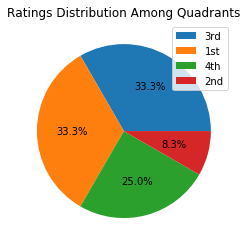

In [8]:
#explore 'emotionQuadrant' ratings
print(dfRaw['emotionQuadrant'].value_counts())

plt.pie(dfRaw['emotionQuadrant'].value_counts(), autopct='%1.1f%%')
plt.legend(labels=['3rd','1st','4th','2nd'])
plt.title('Ratings Distribution Among Quadrants')
plt.show

In [9]:
#analyze acoustic features
acousticFeatures = ['lowEnergy', 'pulseClarity', 'zeroCross', 'rollOff', 'brightness', 'centroid', 'mode']

dfRaw[acousticFeatures].describe()

,lowEnergy,pulseClarity,zeroCross,rollOff,brightness,centroid,mode
count,24.000000,2.400000e+01,24.000000,24.000000,24.000000,24.000000,24.000000
mean,0.527851,3.403663e+05,1574.571742,6177.930587,0.477849,2853.042858,-0.068813
std,0.063069,3.382231e+05,2080.529341,2090.792539,0.117429,844.092503,0.142821
min,0.340570,1.097635e+04,488.822600,1739.158600,0.200570,1030.115300,-0.297740
25%,0.498947,1.638139e+05,851.946775,4731.641250,0.414660,2317.993050,-0.150358
50%,0.532205,2.747127e+05,1111.003250,6115.442300,0.494960,2894.001850,-0.070293
75%,0.550550,3.750679e+05,1561.542925,7704.912175,0.529075,3213.590100,0.015013
max,0.662000,1.626029e+06,11120.145600,10367.992400,0.686050,5073.971000,0.260500


<h2>Data Preparation</h2>

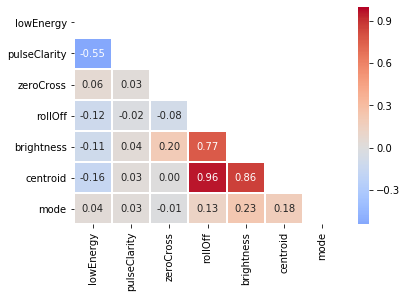

In [10]:
#create the correlation matrix for acoustic features
corr = dfRaw[acousticFeatures].corr()

#generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))

#add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

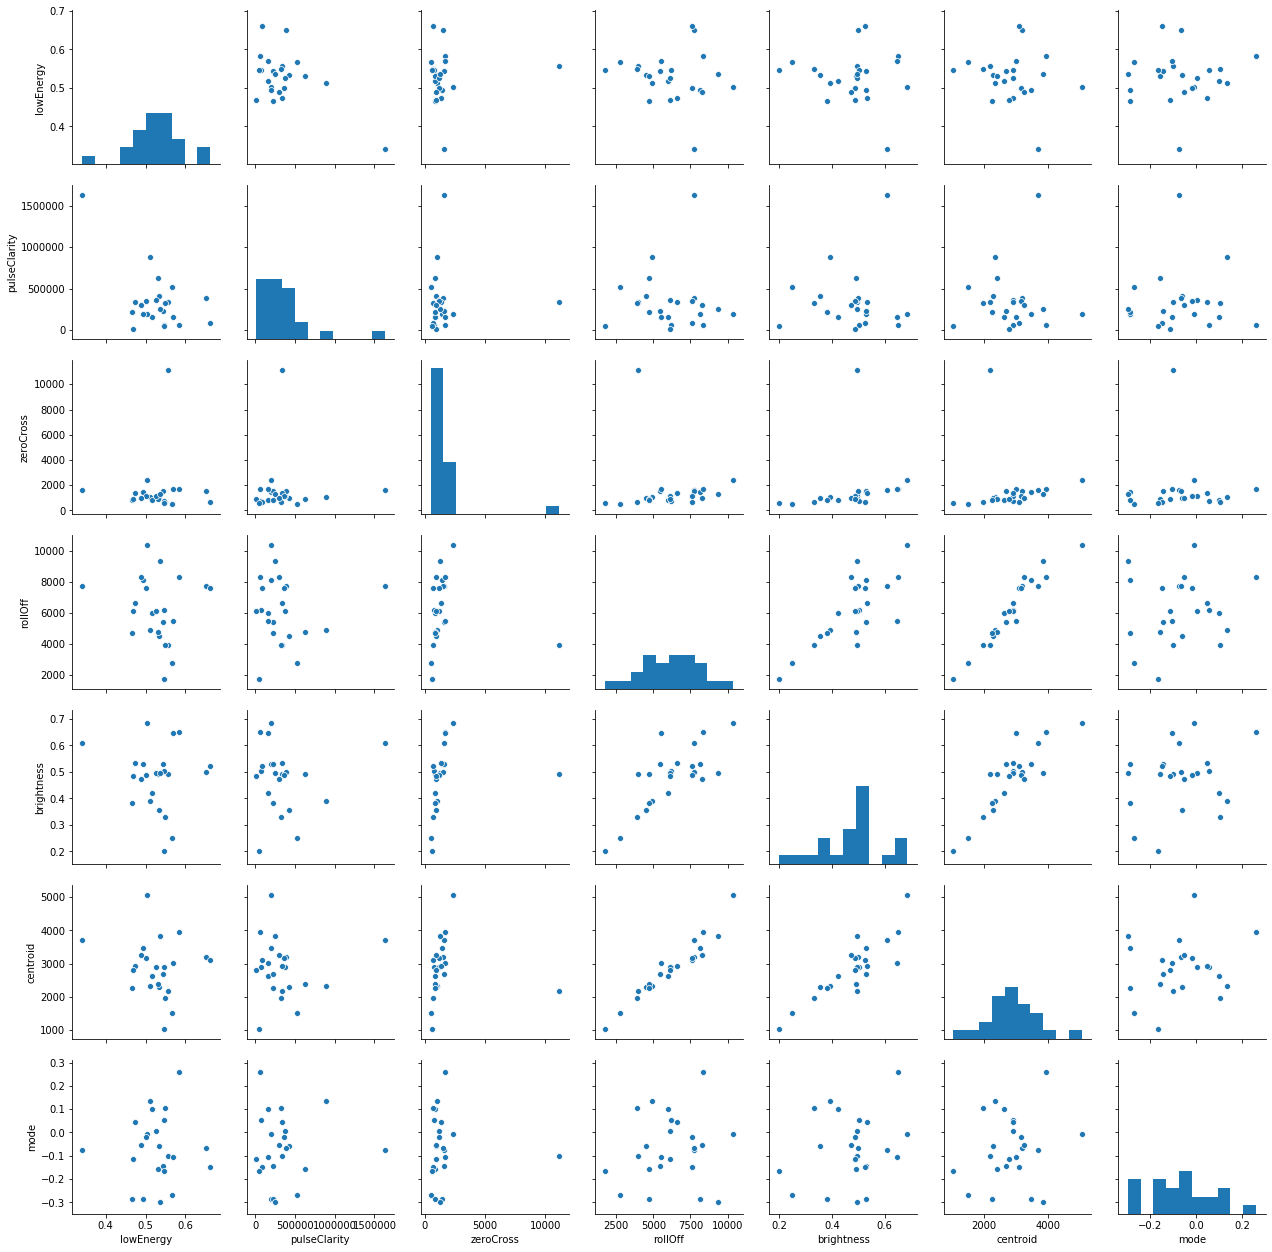

In [11]:
#see correlation visually
sns.pairplot(dfRaw[acousticFeatures], diag_kind='hist')
plt.show()

In [12]:
#drop 2 of the 3 highly correlated features
dfRaw.drop(['centroid','brightness'], axis=1, inplace=True)

dfRaw.columns

Index(['SN', 'participantAge', 'participantSex', 'title', 'artist', 'valence',
       'arousal', 'durationSec', 'lowEnergy', 'pulseClarity', 'zeroCross',
       'rollOff', 'mode', 'emotionQuadrant'],
      dtype='object')

In [13]:
#scale the input data
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X = ss.fit_transform(dfRaw[['lowEnergy', 'pulseClarity', 'zeroCross', 'rollOff', 'mode']])

In [14]:
#identify the 3 target variables
y_arousal = dfRaw['arousal']
y_valence = dfRaw['valence']
y_quad = dfRaw['emotionQuadrant']

<h2>Building the Model</h2>

In [15]:
#import needed libraries for modeling and validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, make_scorer

In [16]:
#prepare the model
model = xgb.XGBClassifier()
#prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [17]:
#make scorer
def classification_report_with_accuracy_score(y_true, y_pred):
    
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    
    return accuracy_score(y_true, y_pred) # return accuracy score

In [18]:
#variables for classification report
originalclass = []
predictedclass = []

#nested CV
score_quad = cross_val_score(model, X=X, y=y_quad, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))

#average values in classification report for all folds in K-fold Cross-validation  
print("Predicting Emotion Quadrant")
print(classification_report(originalclass, predictedclass)) 

Predicting Emotion Quadrant
              precision    recall  f1-score   support

           1       0.12      0.12      0.12         8
           2       0.00      0.00      0.00         2
           3       0.14      0.12      0.13         8
           4       0.22      0.33      0.27         6

    accuracy                           0.17        24
   macro avg       0.12      0.15      0.13        24
weighted avg       0.14      0.17      0.15        24



C:\Users\GTS\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:
#variables for classification report
originalclass = []
predictedclass = []

#nested CV
score_arousal = cross_val_score(model, X=X, y=y_arousal, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))

#average values in classification report for all folds in K-fold Cross-validation  
print("Predicting Arousal")
print(classification_report(originalclass, predictedclass)) 

Predicting Arousal
              precision    recall  f1-score   support

           H       0.60      0.60      0.60        10
           L       0.71      0.71      0.71        14

    accuracy                           0.67        24
   macro avg       0.66      0.66      0.66        24
weighted avg       0.67      0.67      0.67        24



In [20]:
#variables for classification report
originalclass = []
predictedclass = []

#nested CV
score_valence = cross_val_score(model, X=X, y=y_valence, cv=cv, scoring=make_scorer(classification_report_with_accuracy_score))

#average values in classification report for all folds in K-fold Cross-validation  
print("Predicting Valence") 
print(classification_report(originalclass, predictedclass)) 

Predicting Valence
              precision    recall  f1-score   support

           H       0.47      0.57      0.52        14
           L       0.14      0.10      0.12        10

    accuracy                           0.38        24
   macro avg       0.31      0.34      0.32        24
weighted avg       0.33      0.38      0.35        24



<h2>Conclusion</h2>

The model did a better job predicting Arousal than Valence or Emotion Quadrant